## Word Embeddings and Semantic Similarity

In [1]:
# STEP 1: Install compatible versions
!pip install numpy==1.26.4 gensim==4.3.3 --force-reinstall

# STEP 2: Verify
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-100")
print("✅ GloVe model loaded successfully!")


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling nu

In [3]:
# Imports
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [7]:
# Task 2: Word Similarity
word_pairs = [
    ("car", "automobile"),
    ("car", "fruit"),
    ("king", "queen"),
    ("man", "woman"),
    ("tree", "leaf"),
    ("cat", "dog"),
    ("banana", "monkey")
]
print("\n Word Pair Similarities:")
for w1, w2 in word_pairs:
    if w1 in model and w2 in model:
        similarity = model.similarity(w1, w2)
        print(f"{w1:>10} ↔ {w2:<10}: {similarity:.4f}")
    else:
        print(f"{w1} or {w2} not found in vocabulary.")


 Word Pair Similarities:
       car ↔ automobile: 0.6832
       car ↔ fruit     : 0.2309
      king ↔ queen     : 0.7508
       man ↔ woman     : 0.8323
      tree ↔ leaf      : 0.6365
       cat ↔ dog       : 0.8798
    banana ↔ monkey    : 0.2527


In [8]:
# Task 3: Sentence Similarity

def sentence_vector(sentence, model):
    tokens = [w for w in sentence.lower().split() if w in model]
    if not tokens:
        return np.zeros(model.vector_size)
    return np.mean([model[w] for w in tokens], axis=0)

sentences = [
    "The cat sat on the mat",
    "The dog lay on the rug",
    "Cars and trucks are vehicles",
    "Apples and bananas are fruits"
]

print("\ Sentence Similarities:")
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        vec1 = sentence_vector(sentences[i], model)
        vec2 = sentence_vector(sentences[j], model)
        sim = cosine_similarity([vec1], [vec2])[0][0]
        print(f"\"{sentences[i]}\" ↔ \"{sentences[j]}\": {sim:.4f}")


\ Sentence Similarities:
"The cat sat on the mat" ↔ "The dog lay on the rug": 0.9443
"The cat sat on the mat" ↔ "Cars and trucks are vehicles": 0.5911
"The cat sat on the mat" ↔ "Apples and bananas are fruits": 0.5249
"The dog lay on the rug" ↔ "Cars and trucks are vehicles": 0.6299
"The dog lay on the rug" ↔ "Apples and bananas are fruits": 0.5705
"Cars and trucks are vehicles" ↔ "Apples and bananas are fruits": 0.6269


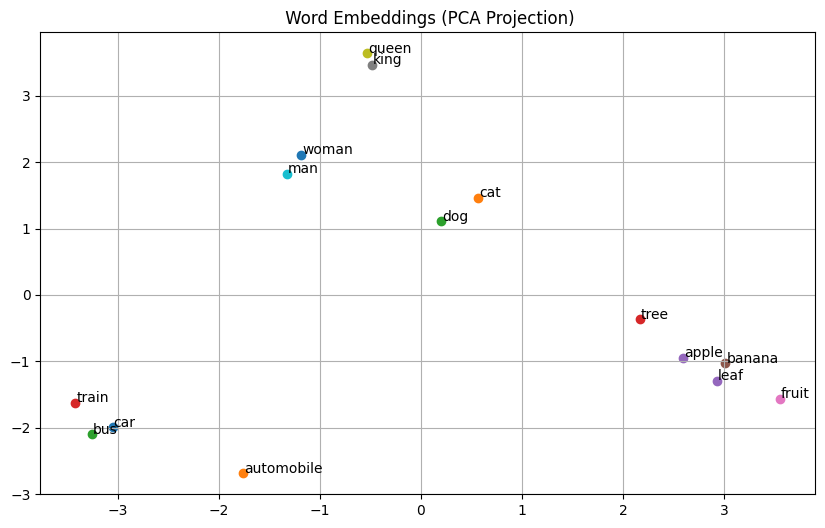

In [10]:
# Task 4: Word Embedding Visualization
words_to_visualize = ["car", "automobile", "bus", "train", "apple", "banana", "fruit",
                      "king", "queen", "man", "woman", "cat", "dog", "tree", "leaf"]
vectors = [model[word] for word in words_to_visualize]

# PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)

plt.figure(figsize=(10, 6))
plt.title(" Word Embeddings (PCA Projection)")
for i, word in enumerate(words_to_visualize):
    plt.scatter(pca_result[i, 0], pca_result[i, 1])
    plt.text(pca_result[i, 0]+0.01, pca_result[i, 1]+0.01, word)
plt.grid(True)
plt.show()


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c814b5f51c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


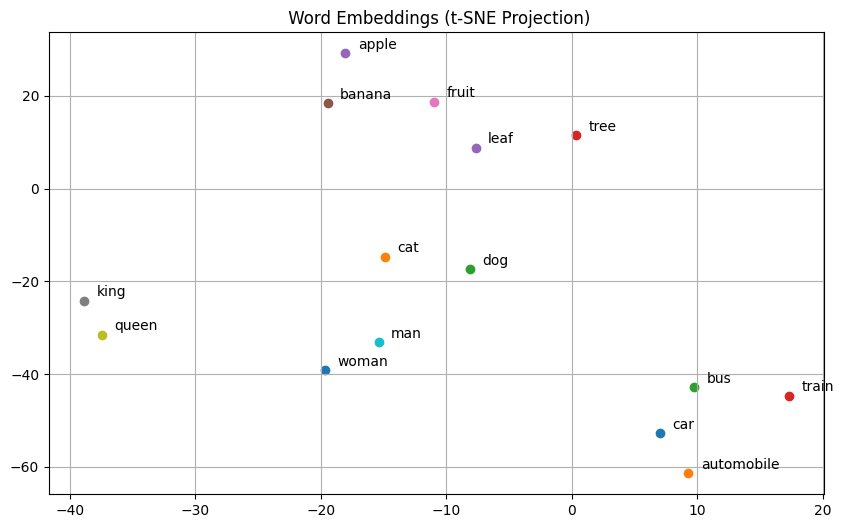

In [12]:
# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(np.array(vectors))

plt.figure(figsize=(10, 6))
plt.title(" Word Embeddings (t-SNE Projection)")
for i, word in enumerate(words_to_visualize):
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1])
    plt.text(tsne_result[i, 0]+1, tsne_result[i, 1]+1, word)
plt.grid(True)
plt.show()